# ST-GCN

In [1]:
import pandas as pd
from st_gcn import *
df = pd.read_csv('data/data_for_model.csv')
df.head()

,LEFT_ELBOW_x,LEFT_HIP_x,LEFT_SHOULDER_x,LEFT_WRIST_x,RIGHT_ELBOW_x,RIGHT_HIP_x,RIGHT_SHOULDER_x,RIGHT_WRIST_x,LEFT_ELBOW_y,LEFT_HIP_y,...,RIGHT_WRIST_y,LEFT_ELBOW_z,LEFT_HIP_z,LEFT_SHOULDER_z,LEFT_WRIST_z,RIGHT_ELBOW_z,RIGHT_HIP_z,RIGHT_SHOULDER_z,RIGHT_WRIST_z,exercise
0,0.494306,0.435416,0.461974,0.492193,0.320912,0.381529,0.367181,0.322582,0.507141,0.630740,...,0.502203,-0.089719,0.000337,0.039939,-0.346921,-0.075649,-0.000382,0.042103,-0.336874,-1
1,0.492015,0.435435,0.462259,0.491906,0.320943,0.381469,0.366824,0.320433,0.521023,0.630559,...,0.503574,-0.093571,0.000344,0.051836,-0.364749,-0.065798,-0.000387,0.052328,-0.318225,-1
2,0.492051,0.435449,0.462260,0.491421,0.320974,0.381461,0.366673,0.319015,0.517668,0.630147,...,0.498068,-0.108150,0.000348,0.058875,-0.375957,-0.076405,-0.000389,0.058376,-0.319684,-1
3,0.491493,0.435497,0.462321,0.492260,0.320294,0.381467,0.366689,0.318692,0.525453,0.629820,...,0.488508,-0.073606,0.001731,0.072559,-0.326744,-0.084063,-0.001726,0.055875,-0.333625,-1
4,0.491555,0.435549,0.462301,0.493636,0.318972,0.381528,0.366703,0.318285,0.523011,0.629353,...,0.481967,-0.078110,0.002196,0.068983,-0.335180,-0.097579,-0.002175,0.054835,-0.344045,-1


## Example sequence

C:\Users\Happy\Documents\Studia - sem2\human-activity-recognition-stgcn\data_viz_3d.py:181: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


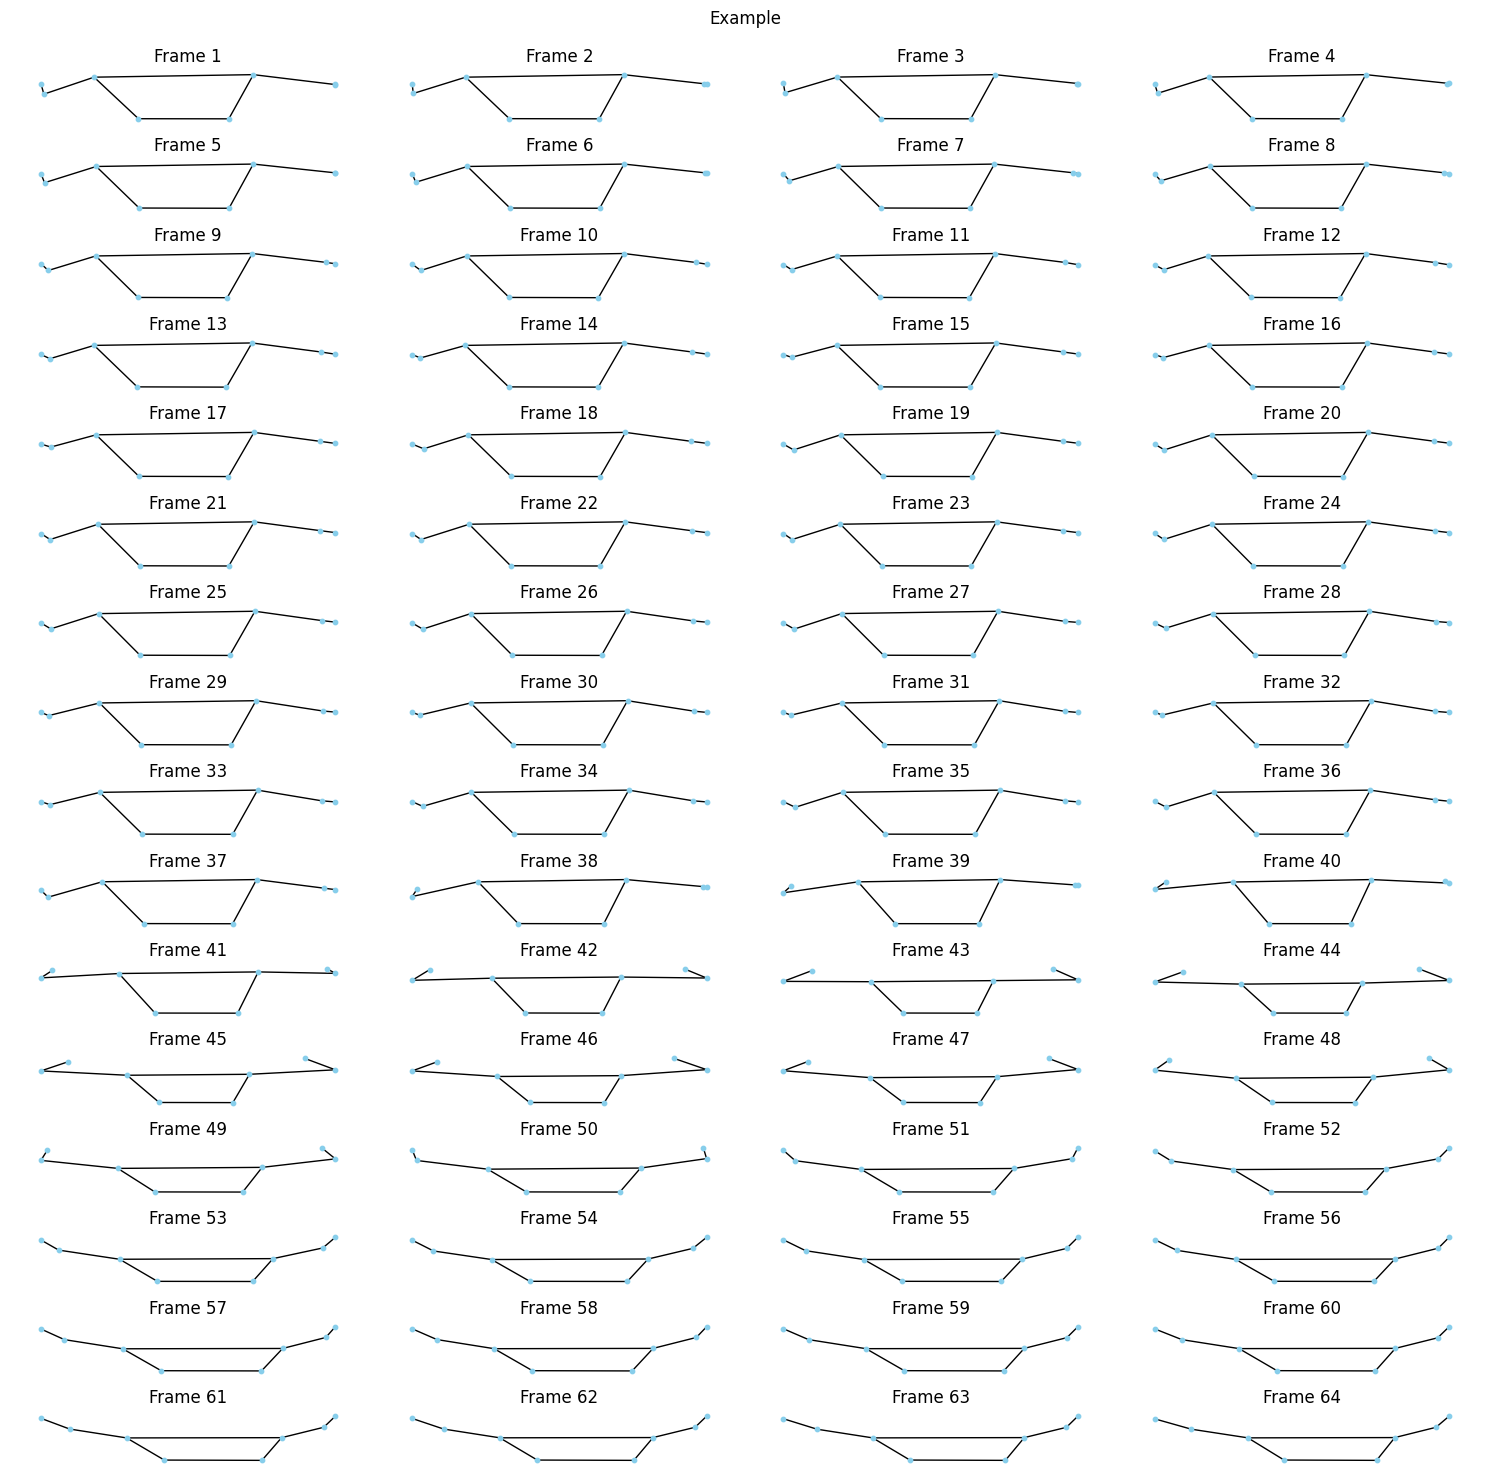

In [2]:
from data_viz_3d import plot_sequence, prepare_sequence
from data_loader import create_sequences
%matplotlib inline

sequences = prepare_sequence(df)
idx = 5
example = torch.from_numpy(sequences[idx:idx+64]).float()
plot_sequence(example, f"Example")

## Data Augmentation

In [3]:
import numpy as np

np.random.seed(42)
pose_augmenter = PoseAugmenter(rotation_range = 2, noise_scale_factor = 0.01)

### Horizontal flip

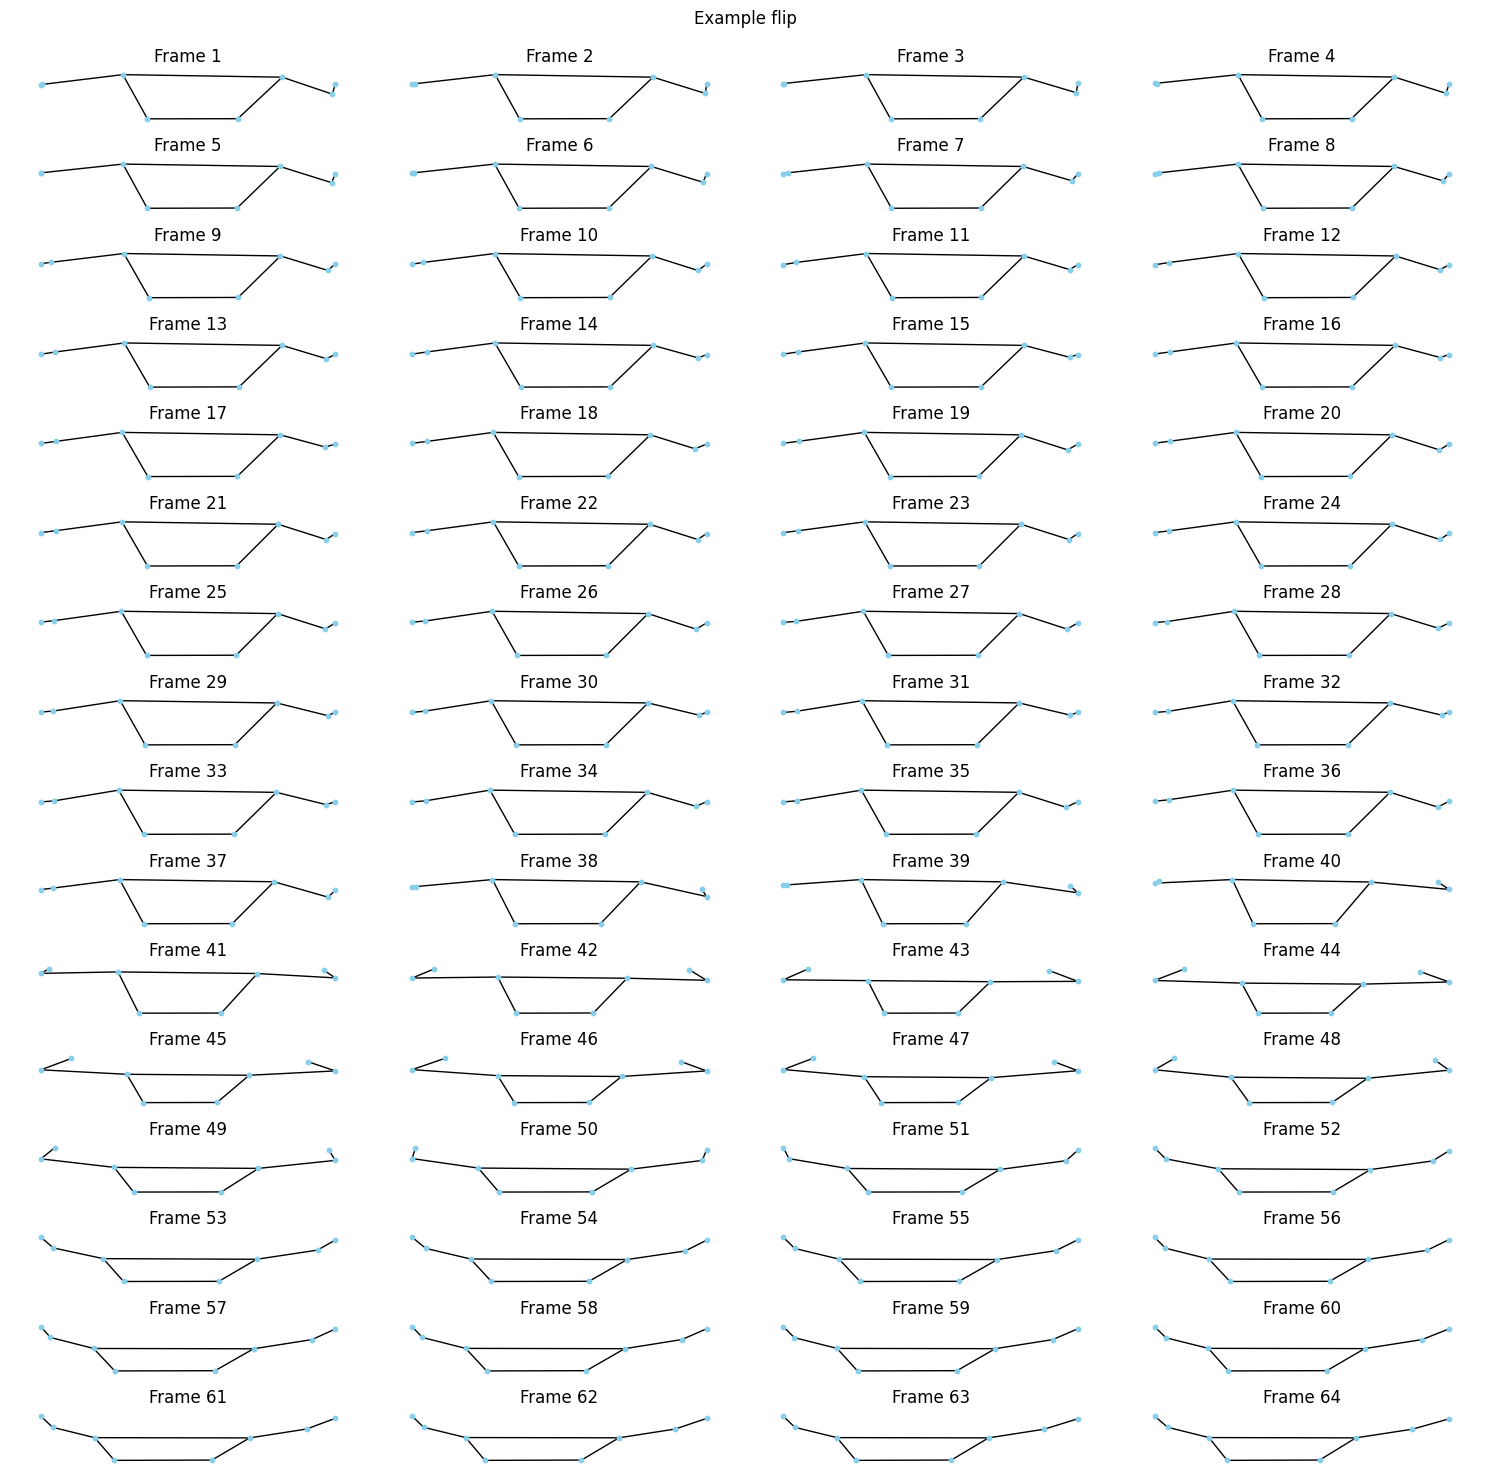

In [4]:
flip_seq = pose_augmenter.horizontal_flip(example)
plot_sequence(flip_seq, f"Example flip")

### Rotate

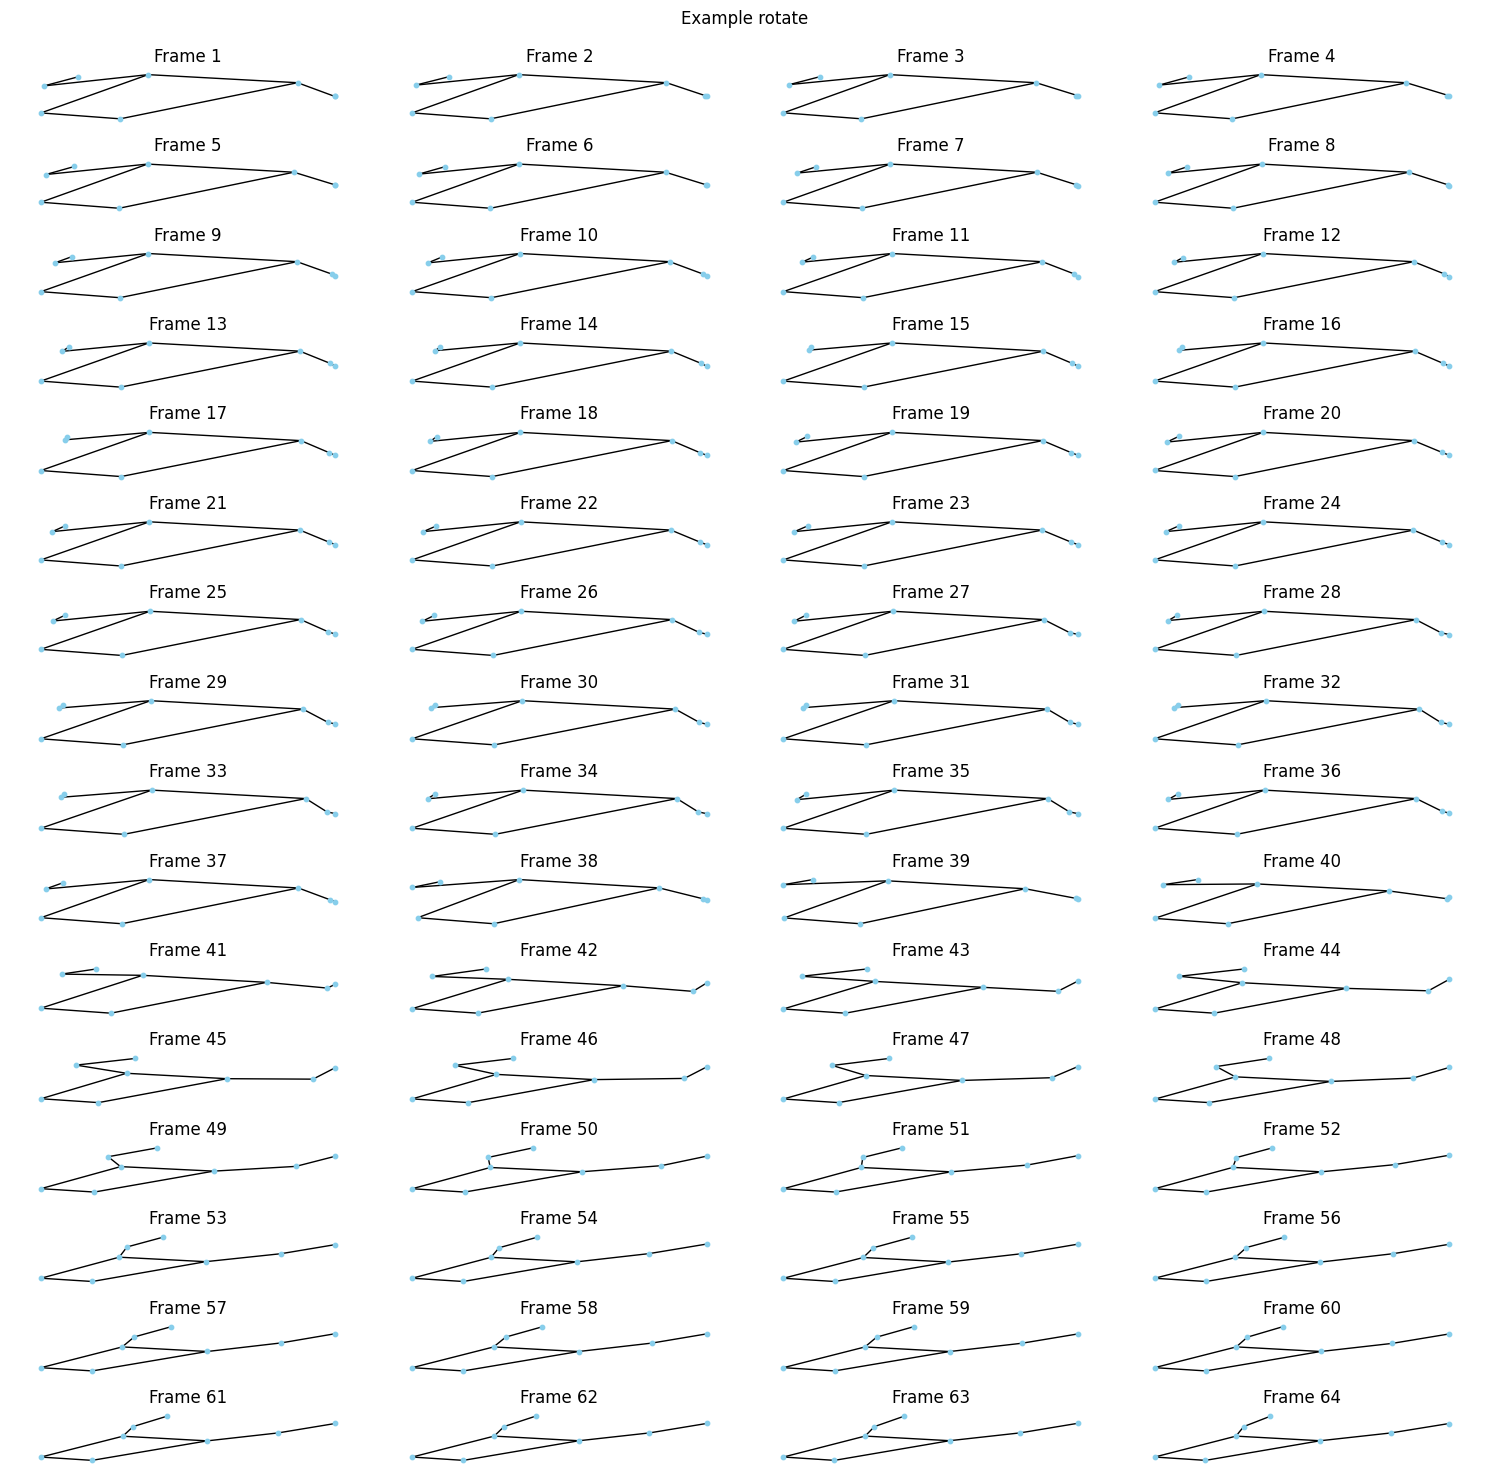

In [5]:
import torch

rotate_seq = pose_augmenter.rotate_sequence(example)
plot_sequence(rotate_seq, f"Example rotate")

### Distort

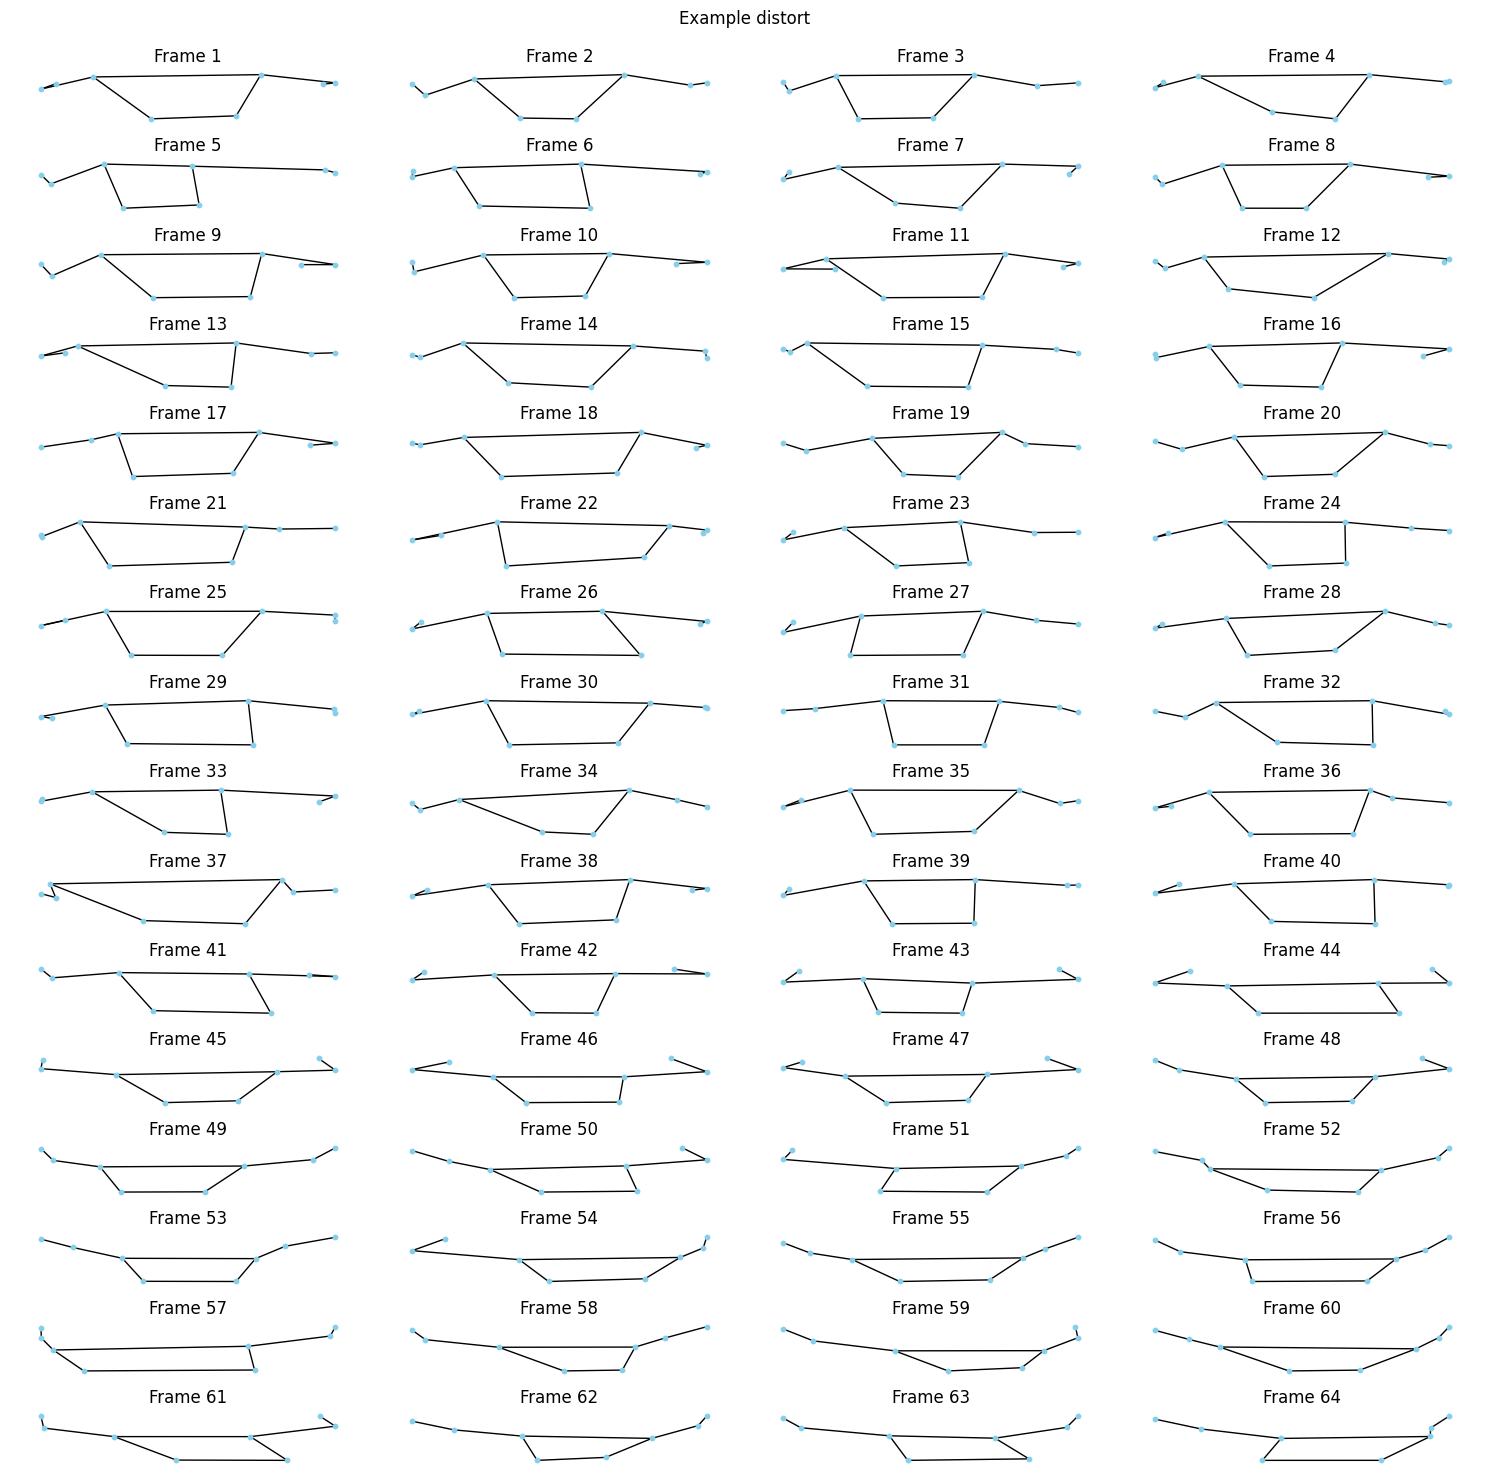

In [6]:
distort_seq = pose_augmenter.distort_sequence(example)
plot_sequence(distort_seq, f"Example distort")

## Model Training

In [7]:
model = run_training()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: iedylag (iedylag-agh-racing). Use `wandb login --relogin` to force relogin


Original exercise labels: [np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15)]
Number of classes: 16
Label mapping: {np.int64(-1): 0, np.int64(0): 1, np.int64(1): 2, np.int64(2): 3, np.int64(3): 4, np.int64(4): 5, np.int64(6): 6, np.int64(7): 7, np.int64(8): 8, np.int64(9): 9, np.int64(10): 10, np.int64(11): 11, np.int64(12): 12, np.int64(13): 13, np.int64(14): 14, np.int64(15): 15}
Creating sequences...
Created 261 sequences of shape (261, 64, 8, 3)

Splitting into train/test sets...

Training samples: 208
Testing samples: 53
Number of classes: 16
Sequence shape: (261, 64, 8, 3)


C:\Users\Happy\Documents\Studia - sem2\human-activity-recognition-stgcn\.venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/100] - LR: 0.001000
Train Loss: 2.3145 | Accuracy: 0.3462
Val Loss: 2.6417 | Accuracy: 0.2642
----------------------------------------
Epoch [2/100] - LR: 0.001000
Train Loss: 1.6285 | Accuracy: 0.5048
Val Loss: 2.6054 | Accuracy: 0.2642
----------------------------------------
Epoch [3/100] - LR: 0.001000
Train Loss: 1.3532 | Accuracy: 0.5529
Val Loss: 3.4676 | Accuracy: 0.2642
----------------------------------------
Epoch [4/100] - LR: 0.001000
Train Loss: 1.2303 | Accuracy: 0.5865
Val Loss: 4.1650 | Accuracy: 0.2642
----------------------------------------
Epoch [5/100] - LR: 0.001000
Train Loss: 0.9986 | Accuracy: 0.7115
Val Loss: 4.2147 | Accuracy: 0.2642
----------------------------------------
Epoch [6/100] - LR: 0.001000
Train Loss: 0.8798 | Accuracy: 0.7548
Val Loss: 3.1405 | Accuracy: 0.2642
----------------------------------------
Epoch [7/100] - LR: 0.001000
Train Loss: 0.8358 | Accuracy: 0.7308
Val Loss: 2.4152 | Accuracy: 0.3774
---------------------------------

epoch,▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
learning_rate,█████████████████▄▄▄▄▄▄▄▄▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁
train_accuracy,▁▃▄▅▆▆▆▆▇▇▆▇▇▇▇▇▇███▇▇▇██▇██████████████
train_loss,█▆▅▄▄▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_accuracy,▁▁▁▁▁▂▅▇▇▇▆▇▆▆▇▆▇▇▇▇█▇▇▇▇█▇█▇▆▆▆▅▇█▇▇█▇▇
val_loss,▅▅▇██▅▇▃▁▁▁▂▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▂▂▃▃▁▁▁▁▁▁▁
epoch,48
learning_rate,6e-05
train_accuracy,0.92788
train_loss,0.24211
val_accuracy,0.83019


## Prediction

In [8]:
def run_predction(model, sequence):
    model.eval()
    with torch.no_grad():
        prediciton = model(sequence.unsqueeze(0))
    return torch.argmax(prediciton)

C:\Users\Happy\Documents\Studia - sem2\human-activity-recognition-stgcn\data_viz_3d.py:181: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


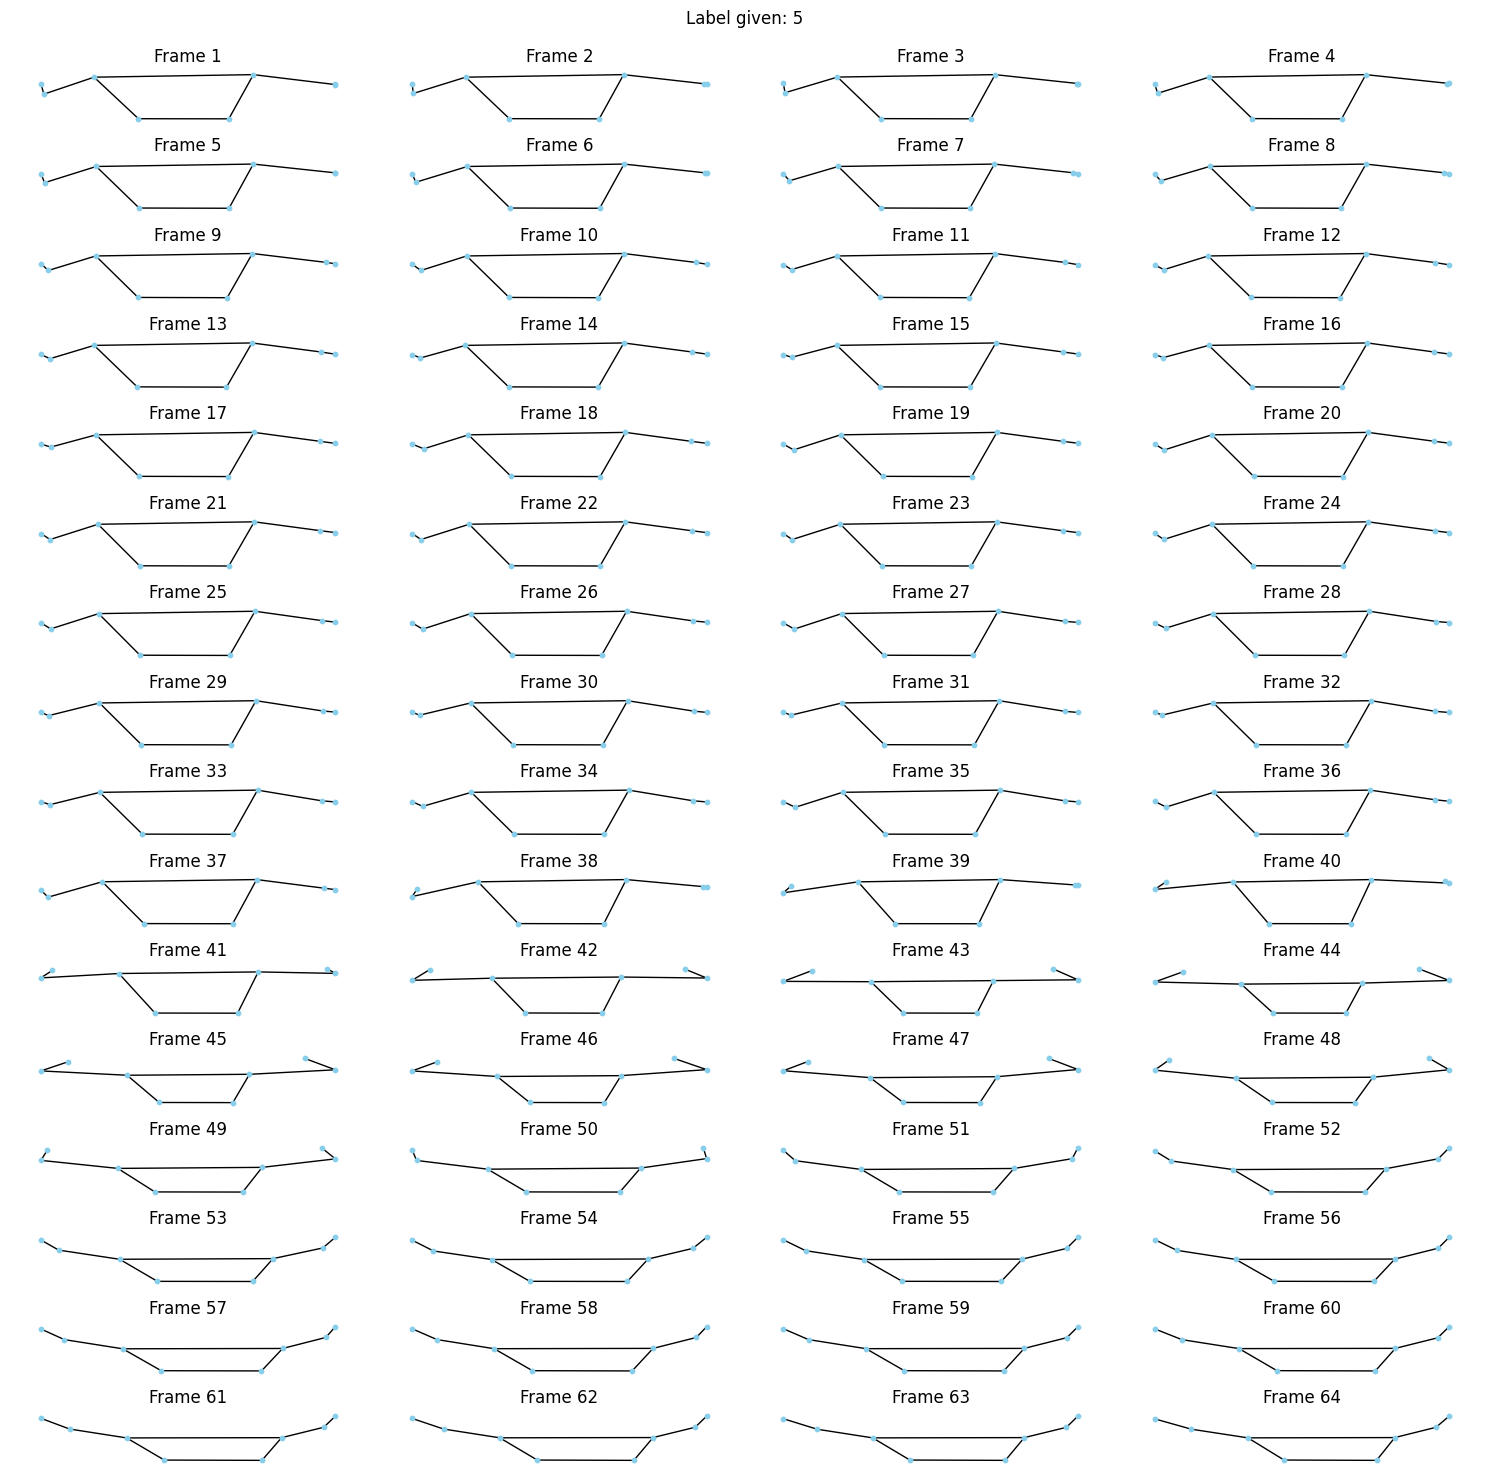

In [9]:
label = run_predction(model, example)
plot_sequence(example, f"Label given: {label}")